## Crop and Fertilizer recomendation system using ML


In [2]:
#importing neccessary libraries for creating recommendation system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import random



In [3]:
# loadind dataset
crop=pd.read_csv("dataset/Crop_recommendation.csv")

In [4]:
#The head() method is used to view the first few rows of a DataFrame.
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#shows first row only
crop.head(1)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice


In [6]:
#shows only column names
crop.head(0)

,N,P,K,temperature,humidity,ph,rainfall,label


In [7]:
#The tail() method is used to view the last  rows of a DataFrame.
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
#shows only column name
crop.tail(0)

,N,P,K,temperature,humidity,ph,rainfall,label


In [9]:

#shows only last row
crop.tail(1)

,N,P,K,temperature,humidity,ph,rainfall,label
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


The info() method in Pandas is used to provide a concise summary of a DataFrame, which includes details like:
Number of rows and columns.
Column names and data types.
Number of non-null (non-missing) entries for each column.
Memory usage of the DataFrame.

In [10]:

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
#The shape attribute in Pandas is used to determine the dimensions of a DataFrame or Series. It returns a tuple
crop.shape

(2200, 8)

# To check missing values in crop dataset
isnull(): Returns a DataFrame or Series of the same shape with True 
for missing values and False for non-missing values.

In [12]:

crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [13]:
#isnull().sum(): Provides a column-wise total of missing values.
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
#duplicated() method to identify duplicate rows in the DataFrame.
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [15]:
#Count the Total Number of Duplicates and drop_duplicates() for removing duplicates
crop.duplicated().sum()

0

# To check statictics of dataset or Quick Data Summary
we use describe() method
The function returns a DataFrame with summary statistics:
For numeric columns:
count: The number of non-NaN values.
mean: The average of the values.
std: The standard deviation.
min: The smallest value.
25%: The 25th percentile.
50%: The 50th percentile (median).
75%: The 75th percentile.
max: The largest value.
For categorical columns:

count: The number of non-NaN values.
unique: The number of unique categories.
top: The most frequent category.
freq: The frequency of the most common category.


In [16]:
#To check statictics of dataset or Quick Data Summary:

crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
#check target distribution
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

1)The value_counts() function in Pandas is used to return a Series containing counts of unique values in a DataFrame column.
It is especially useful to understand the distribution of categorical data or 
to count occurrences of different classes/labels in a dataset.

In [18]:

crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

To Normalize data: If you set normalize=True, it returns the relative frequencies of the unique values instead of raw counts

In [19]:

crop['label'].value_counts(normalize=True)

label
rice           0.045455
maize          0.045455
jute           0.045455
cotton         0.045455
coconut        0.045455
papaya         0.045455
orange         0.045455
apple          0.045455
muskmelon      0.045455
watermelon     0.045455
grapes         0.045455
mango          0.045455
banana         0.045455
pomegranate    0.045455
lentil         0.045455
blackgram      0.045455
mungbean       0.045455
mothbeans      0.045455
pigeonpeas     0.045455
kidneybeans    0.045455
chickpea       0.045455
coffee         0.045455
Name: proportion, dtype: float64

In [35]:
crop_summary=pd.pivot_table(crop,index=['label'],aggfunc='mean')

In [21]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


The graph_objects module in Plotly is a part of the Plotly Python library. It provides a low-level, flexible way to build and customize interactive visualizations.

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
columns = ["N", "P","K"]

# Create a subplot layout with 1 row and len(columns) columns
fig = make_subplots(rows=1, cols=len(columns), subplot_titles=[f"Boxplot of {col}" for col in columns])

# Add each column to the subplots using a for loop
for i, col in enumerate(columns, start=1):
    fig.add_trace(
        go.Box(y=crop[col], boxpoints="all", name=col),
        row=1, col=i  # Place each plot in its corresponding column
    )

# Update layout to add title and formatting
fig.update_layout(title_text="Boxplots for Nutrient Content", showlegend=False)

# Show the combined plot
fig.show()

# Encoding


In [24]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [25]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [26]:

features = crop.drop(['label'], axis=1)
target = crop['label']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

# Visualize and analyze data
This visualization is a correlation heatmap that presents the relationships between numeric variables in the dataset. Each cell represents the correlation coefficient between a pair of variables, color-coded to convey the strength and direction of the relationship.

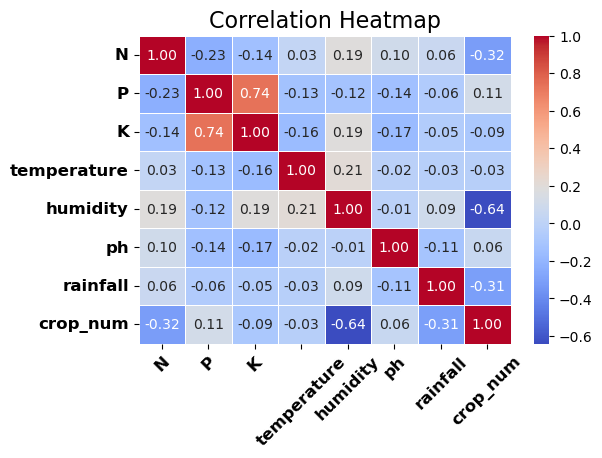

In [28]:


# Filter only numeric columns
numeric_columns = crop.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12, fontweight="bold", rotation=45)
plt.yticks(fontsize=12, fontweight="bold", rotation=0) 

# Show the heatmap
plt.show()


# Visualize Nitrogen

In [29]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']
     

In [30]:
#Sort the values by nitrogen
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:11].sort_values().index,
    'x' : crop_summary_N['N'][0:11].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-11:].index,
    'x' : crop_summary_N['N'][-11:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color= random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color= random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
     

# Visualize Phosphorus

In [31]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:11].sort_values().index,
    'x' : crop_summary_P['P'][0:11].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-11:].index,
    'x' : crop_summary_P['P'][-11:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Visualize Potassium

In [32]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
     